## 1 Preliminaries                          

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/pandas/pandas_assignment.ipynb)

In [38]:
# The usual preamble
import pandas as pd
from matplotlib import pyplot as plt
#%matplotlib inline
# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
#pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

#figsize(15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [39]:
import pandas as pd
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/names/yob2000.txt'
names2000 = pd.read_csv(url,names=['name','sex','births'])

In [40]:
names2000

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
...,...,...,...
29753,Zeph,M,5
29754,Zeven,M,5
29755,Ziggy,M,5
29756,Zo,M,5


## Basic Pandas skills (Baby names data)

###  2.1 Selecting columns and rows

In next cell, write an expression that returns a `pandas` `Series` with just the names in the `name` column.

In [41]:
names = pd.DataFrame(names2000)
names["name"]

0          Emily
1         Hannah
2        Madison
3         Ashley
4          Sarah
          ...   
29753       Zeph
29754      Zeven
29755      Ziggy
29756         Zo
29757      Zyier
Name: name, Length: 29758, dtype: object

In the next cell, write an expression that returns the first 25 rows of the `names2000` dataframe,

In [42]:
names[:25]

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677
5,Alexis,F,17622
6,Samantha,F,17262
7,Jessica,F,15698
8,Elizabeth,F,15077
9,Taylor,F,15076


In the next cell write an expression that returns the first 25 row of the `name` column.

In [43]:
names["name"][:25]

0         Emily
1        Hannah
2       Madison
3        Ashley
4         Sarah
5        Alexis
6      Samantha
7       Jessica
8     Elizabeth
9        Taylor
10       Lauren
11       Alyssa
12        Kayla
13      Abigail
14      Brianna
15       Olivia
16         Emma
17        Megan
18        Grace
19     Victoria
20       Rachel
21         Anna
22       Sydney
23      Destiny
24       Morgan
Name: name, dtype: object

###  2.2 Selecting multiple columns

What if we just want to know the gender and the birth counts, but not the name? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.  Write an expression that that returns a data frame with just the `births` and `sex` columns of the `names2000` dataframe.

In [44]:
names[["births", "sex"]]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
...,...,...
29753,5,M
29754,5,M
29755,5,M
29756,5,M


Now write an expression that returns just the first ten rows of the dataframe you returned the cell above. 

In [45]:
names[["births", "sex"]][:10]

,births,sex
0,25949,F
1,23066,F
2,19965,F
3,17991,F
4,17677,F
5,17622,F
6,17262,F
7,15698,F
8,15077,F
9,15076,F


### 2.3 Plotting

Write some lines of code that do a barplot of the first fifteen rows of the `names2000` dataframe.  Make sure the `x`-axis shows the name associated with each bar (and not just an arbitrary integer).

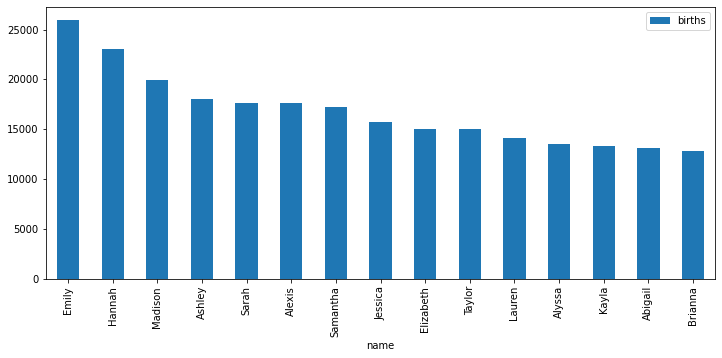

In [46]:
names_15 = names2000[["name", "births"]][:15]
names_15.plot(kind = "bar", x = "name", y = "births", figsize = (12,5))
plt.show()

## 3 Aggregation (Service requests data)

The following code loads the service requests data used in one of your pandas notebooks, and creates 
a subtable consisting of the data for just three agencies.  It then adds a **new** column called `Count`,
which we're going to use for counting complaints.  Since each row represents exactly one complain,
the value in the `Count` column is always 1.

You can learn more about this data set in the [pandas pivot and merge notebook.](https://github.com/gawron/python-for-social-science/blob/master/pandas/pandas_pivot_and_merge.ipynb)

In [47]:
import pandas as pd
fn = '311-service-requests.csv'
base_url = 'https://github.com/gawron/pandas-cookbook/master/data'
path = f'{base_url}/{fn}'
raw_path = path.replace('github.com','raw.githubusercontent.com')
complaints = pd.read_csv(raw_path,error_bad_lines=False)
complaints['Count'] = 1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Looking at the `Count` column:

In [48]:
complaints['Count'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Count, dtype: int64

The following code creates a subtable with just the complaints for the following three
agencies: `DOT`, `DOP`, and `NYPD`.

In [49]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]

Your mission should you decide to accept it is to create pivot table whose rows are the three agencies,
and whose columns are the complaint types.  Each cell in the table thus contains the total number of complaints
of that complaint type for that agency.  For example, in the NYPD row, the Animal Abuse column should
have the number 164, meaning that 164 animal abuse complaints were made to NYPD.


## 4.  Baby names

In [50]:
import urllib.request
import tarfile
import os.path

base = 'baby_names'
fn = f'{base}.tar.gz'
url = f'https://github.com/gawron/python-for-social-science/blob/master/pandas/{fn}'

thetarfile = url.replace('github','raw.githubusercontent')
thetarfile = thetarfile.replace('blob/','')

In [51]:
working_dir = '/content/gdrive/My Drive/'
data_dir = os.path.join(working_dir,'data')
try:
  os.makedirs(data_dir)
except:
  pass
os.chdir(data_dir)

with urllib.request.urlopen(thetarfile) as tarhandle:
  thetarstream = tarfile.open(fileobj=tarhandle, mode="r|gz")
  thetarstream.extractall()

In [52]:
import pandas as pd
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = f'names/yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

### 4.1: 

Use the babynames data created in the [general pandas intro notebook.](https://github.com/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb)
     and matplotlib to plot male and female
    births for the years covered in the data. Put this in
    a `jupyter notebook` file.  In the same notebook, use the babynames data to get a list of male and female names.
    

In [53]:
yearly_births_by_sex = names.pivot_table('births','year', 
                                 columns='sex', aggfunc=sum)
yearly_births_by_sex

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


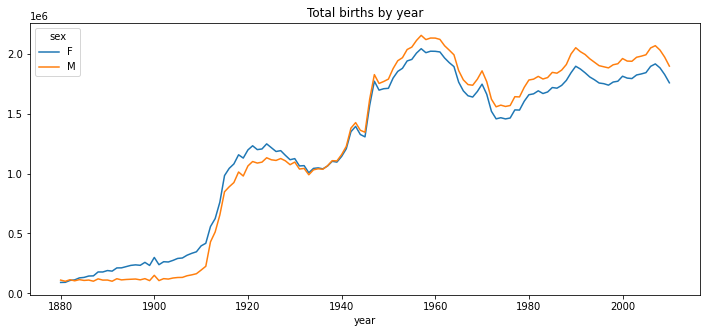

In [54]:
yearly_births_by_sex.plot(title='Total births by year', figsize = (12,5))
plt.show()

### 4.2

Aggregate the data for all years from the website
    (see the examples in the 
    Pandas notebook [general_pandas_intro.](https://github.com/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb>)
    Find the **set** of all male names and the **set**
    of all female names. 
    For each letter find its frequency as a last letter in
    male names and in female names, using 
    Python Counters (`from collections import Counter`).
    Use matplotlib to draw a single plot that  shows
    contrast between the last-letter frequencies 
    for male and female names; x-axis is letters;
    y-axis is frequencies.

    

In [55]:
from collections import Counter
Male_Names = names[names['sex']=='M']['name']
Female_Names = names[names['sex']=='F']['name']

Male_Names_Set = list(set(Male_Names))
Female_Names_Set = list(set(Female_Names))

freq_Male_Names = Counter([w[-1:] for w in Male_Names])
freq_Female_Names = Counter([w[-1:] for w in Female_Names])

freq_last_letter = pd.DataFrame({
    'Male_names_frequency': Counter(freq_Male_Names),
    'Female_names_frequency': Counter(freq_Female_Names)},
    index = list('abcdefghijklmnopqrstuvwxyz'))

freq_last_letter

,Male_names_frequency,Female_names_frequency
a,24595,423070
b,3229,441
c,5040,760
d,36846,6472
e,89654,226579
f,3049,125
g,5079,1736
h,17496,38391
i,17257,44045
j,1200,157


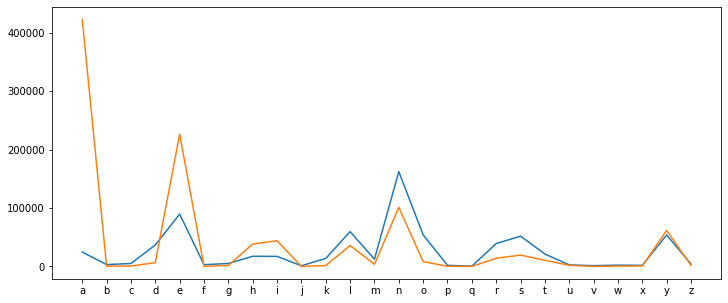

In [56]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(freq_last_letter.index, freq_last_letter['Male_names_frequency'])
ax.plot(freq_last_letter.index, freq_last_letter['Female_names_frequency'])
plt.show()

### 4.3

Another plot.  The x-axis is names;
    the y-axis is frequencies.  Aggregate the data for female names into
    decades (10 year increments).  Produce a plot
    that contains an 1880s line, a 1940s line, and 
    a 1990s line.  There is a display issue here.  There
    are too many names to just write them out on the
    x-axis.  Try to devise an informative way of displaying
    the data that tells a story about fashions in names change.   Hint: Pick a value for n and consider the n most popular names in a decade.  But which decade?

In [57]:
df_1880 = names[(names.year >= 1880) & (names.year < 1890) & (names.sex == 'F')]
df_1940 = names[(names.year >= 1940) & (names.year < 1950) & (names.sex == 'F')]
df_1990 = names[(names.year >= 1990) & (names.year < 2000) & (names.sex == 'F')]

In [58]:
df_80 = df_1880.copy()
df_80 = df_80.drop(['year'],axis=1)
df_80 = df_80.groupby(['name']).sum()
df_80 = df_80.sort_values(by='births', ascending=False)
df_80.size

2060

In [59]:
df_40 = df_1940.copy()
df_40 = df_40.drop(['year'],axis=1)
df_40 = df_40.groupby(['name']).sum()
df_40 = df_40.sort_values(by='births', ascending=False)
df_40.size

9676

In [60]:
df_90 = df_1990.copy()
df_90 = df_90.drop(['year'],axis=1)
df_90 = df_90.groupby(['name']).sum(['births'])
df_90 = df_90.sort_values(by='births', ascending=False)
df_90.size

30831

In [61]:
i1 = df_90.index
i2 = df_40.index
i3 = df_80.index
i4 = i2.intersection(i1)
i5 = i4.intersection(i3)

d1 = df_90[df_90.index.isin(i5)][:15].sort_index()
d2 = df_40[df_40.index.isin(i5)][:15].sort_index()
d3 = df_80[df_80.index.isin(i5)][:15].sort_index()

print(df_90[df_90.index.isin(i5)][:15])
print(df_40[df_40.index.isin(i5)][:15])
print(df_80[df_80.index.isin(i5)][:15])

           births
name             
Jessica    303008
Emily      237189
Sarah      224091
Samantha   223963
Amanda     190962
Elizabeth  172484
Hannah     158706
Rachel     148985
Victoria   117423
Amber      115581
Courtney   113270
Rebecca    109572
Katherine   96839
Melissa     89955
Anna        78392
          births
name            
Mary      639863
Linda     531515
Barbara   425141
Patricia  411330
Carol     292250
Nancy     251977
Judith    217972
Susan     211961
Betty     194585
Carolyn   181806
Margaret  172982
Shirley   171743
Judy      167684
Karen     167658
Donna     165487
           births
name             
Mary        91672
Anna        38159
Emma        25404
Elizabeth   25007
Margaret    21800
Minnie      21724
Ida         18283
Bertha      18263
Clara       17717
Alice       17141
Annie       17027
Florence    16699
Bessie      15371
Grace       15227
Ethel       14866


Another plot. The x-axis is names; the y-axis is frequencies. Aggregate the data for female names into decades (10 year increments). Produce a plot that contains an 1880s line, a 1940s line, and a 1990s line. There is a display issue here. There are too many names to just write them out on the x-axis. Try to devise an informative way of displaying the data that tells a story about fashions in names change. Hint: Pick a value for n and consider the n most popular names in a decade. But which decade?

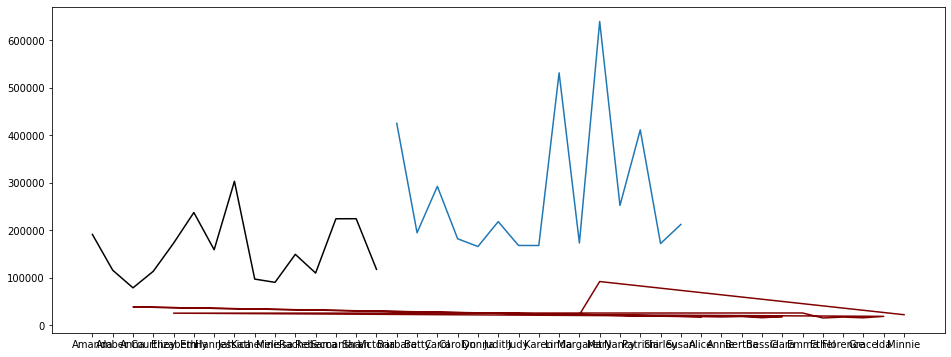

In [62]:
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(d1.index, d1['births'], color='black')
ax.plot(d2.index, d2['births'])
ax.plot(d3.index, d3['births'], color='maroon')
plt.show()

### 4.4 Extra Credit (You can wait until you learn about machine learning to do this)

Train a classifier that distinguishes male names
    from female names.  The features should be the last three
    letters in the names and the first three letters. If a name
    has fewer than six letters, it is okay for a letter to be represented
    both as a first letter and as a last letter.
    (This strategy guarantees that all names have the same length
    representation).  You will have to make a decision about what to do about
    ambiguous names (Lee, Sam, Pat), but don't simply exclude them.
    Note:  There are different interesting ways to deal with this issue, not
    just one answer. You should ask if you are unsure about your
    solution.
    
If a name has fewer than three letters ('Al'), pad it with spaces
    and use the spaces as part of your representation ('Al' => 'Al ') and the first
    three letters are ['A', 'l', ' '] and the last three letters are
    ['A', 'l', ' '].  Separate your names into training and test
    names.  Extra credit.  Does it help to make the decade a feature?
    
Turn  in your  notebook file, showing the code you used to
    complete parts 